loading annotations into memory...
Done (t=0.31s)
creating index...
index created!
数据加载成功！
COCO supercategories: 
vehicle animal indoor outdoor person furniture accessory appliance food electronic sports kitchen
超类总数为：12 


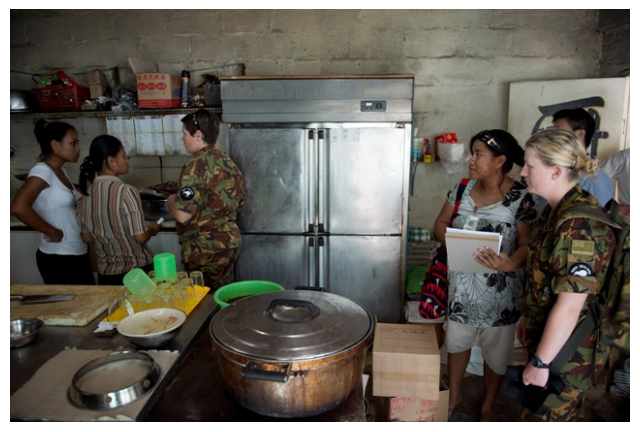

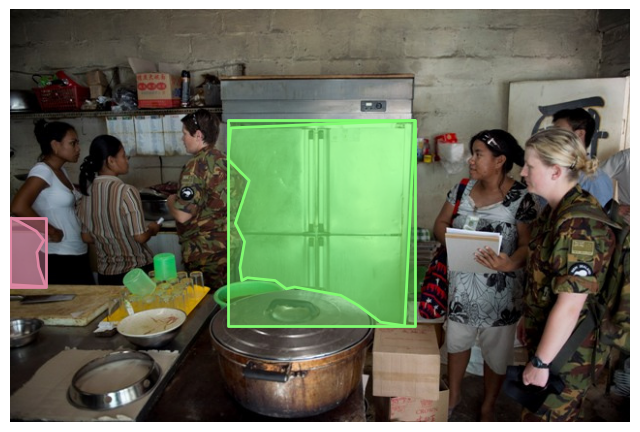

In [4]:
from pycocotools.coco import COCO
import numpy as np
from skimage import io  # scikit-learn 包
import matplotlib.pyplot as plt
import pylab

pylab.rcParams['figure.figsize'] = (8.0, 10.0)

# COCO 是一个类, 因此, 使用构造函数创建一个 COCO 对象, 构造函数首先会加载 json 文件,
# 然后解析图片和标注信息的 id, 根据 id 来创建其关联关系.

dataDir = '/home/wangyu_kyland/dataset/coco/images/val2017'
dataType = 'val2017'
annFile = '/home/wangyu_kyland/dataset/coco/annotations/instances_val2017.json'
# 初始化标注数据的 COCO api
coco = COCO(annFile)
print("数据加载成功！")

# 显示 COCO 数据集中的具体类和超类
categories = coco.loadCats(coco.getCatIds())
label_names = [cat['name'] for cat in categories]
# for i, name in enumerate(label_names):
#     print(name, ' == ', i)
# print('COCO categories: \n{}\n'.format(' '.join(label_names)))
# print("类别总数为： %d" % len(label_names))
super_names = set([cat['supercategory'] for cat in categories])
print('COCO supercategories: \n{}'.format(' '.join(super_names)))
print("超类总数为：%d " % len(super_names))

# 加载并显示指定 图片 id
catIds = coco.getCatIds(catNms=['oven', 'refrigerator'])
imgIds = coco.getImgIds(catIds=catIds)
# imgIds = coco.getImgIds(imgIds=[724])
img = coco.loadImgs(imgIds[0])[0]
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

# 加载并将 “segmentation” 标注信息显示在图片上
# 加载并显示标注信息
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns,draw_bbox=True)
